In [40]:
import anndata
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from ALLCools.plot import *
from ALLCools.clustering.doublets import coverage_doublets

In [2]:
cell_meta = pd.read_hdf(
    '/home/hanliu/project/cemba/metainfo/CellMetadata.324687.2021-09-13.hdf')
total_adata = anndata.read_h5ad(
    '/home/hanliu/project/cemba/study/Clustering/MethylomeEnsembl/L1/adata.with_coords.h5ad'
)

good = total_adata.obs[total_adata.obs['L1'].isin(['c1', 'c3'
                                                   ])].sample(1000,
                                                              random_state=0)
good['Type'] = 'Normal'
bad = total_adata.obs[total_adata.obs['L1'].isin(['c33', 'c34'
                                                  ])].sample(1000,
                                                             random_state=0)
bad['Type'] = 'DoubletsOrDebris'
total_cells = pd.concat([good, bad])
total_cells['allc_path'] = cell_meta['AllcPath']
total_cells.to_csv('cell_meta.csv')

# only snmC
total_cells = total_cells.dropna(subset=['allc_path'])

In [41]:
plate_fc = cell_meta.groupby('Plate').apply(lambda i: i['FinalReads'] / i['FinalReads'].median())
plate_fc.index = plate_fc.index.droplevel(0)
total_cells['plate_fc'] = np.log2(plate_fc)

In [3]:
total_cells['Type'].value_counts()

DoubletsOrDebris    969
Normal              824
Name: Type, dtype: int64

In [4]:
cell_values = coverage_doublets(allc_dict=total_cells['allc_path'].to_dict(),
                                resolution=100,
                                cpu=10,
                                keep_tmp=True)

[W::hts_idx_load3] The index file is older than the data file: /gale/ddn/cemba/CEMBA/Mouse/CEMBA_RS1/8L/CEMBA201008_8L_2-4-B24/allc/CEMBA201008_8L_2-4-B24-K19.allc.tsv.gz.tbi
[W::hts_idx_load3] The index file is older than the data file: /gale/ddn/cemba/CEMBA/Mouse/CEMBA_RS1/8L/CEMBA201008_8L_3-2-O5/allc/CEMBA201008_8L_3-2-O5-I15.allc.tsv.gz.tbi
[W::hts_idx_load3] The index file is older than the data file: /gale/ddn/cemba/CEMBA/Mouse/CEMBA_RS1/12C/CEMBA201022_12C_3-5-M5/allc/CEMBA201022_12C_3-5-M5-G10.allc.tsv.gz.tbi
[W::hts_idx_load3] The index file is older than the data file: /gale/ddn/cemba/CEMBA/Mouse/CEMBA_RS1/11K/CEMBA201022_11K_2-6-H2/allc/CEMBA201022_11K_2-6-H2-D12.allc.tsv.gz.tbi
[W::hts_idx_load3] The index file is older than the data file: /gale/ddn/cemba/CEMBA/Mouse/CEMBA_RS1/12C/CEMBA201015_12C_3-2-P20/allc/CEMBA201015_12C_3-2-P20-I3.allc.tsv.gz.tbi
[W::hts_idx_load3] The index file is older than the data file: /gale/ddn/cemba/CEMBA/Mouse/CEMBA_RS1/11K/CEMBA201015_11K_1-

[W::hts_idx_load3] The index file is older than the data file: /gale/ddn/cemba/CEMBA/Mouse/CEMBA_RS1/7F/CEMBA200723_7F_3-5-E5/allc/CEMBA200723_7F_3-5-E5-I21.allc.tsv.gz.tbi
[W::hts_idx_load3] The index file is older than the data file: /gale/ddn/cemba/CEMBA/Mouse/CEMBA_RS1/6F/CEMBA200723_6F_3-5-J23/allc/CEMBA200723_6F_3-5-J23-F21.allc.tsv.gz.tbi
[W::hts_idx_load3] The index file is older than the data file: /gale/raidix/rdx-4/mapping/13F/CEMBA210311_13F_1-4-C3/allc/CEMBA210311_13F_1-4-C3-I8.allc.tsv.gz.tbi
[W::hts_idx_load3] The index file is older than the data file: /gale/ddn/cemba/CEMBA/Mouse/CEMBA_RS1/12H/CEMBA200730_12H_4-4-A12/allc/CEMBA200730_12H_4-4-A12-I8.allc.tsv.gz.tbi
[W::hts_idx_load3] The index file is older than the data file: /gale/ddn/cemba/CEMBA/Mouse/CEMBA_RS1/6F/CEMBA200723_6F_1-6-I13/allc/CEMBA200723_6F_1-6-I13-O12.allc.tsv.gz.tbi
[W::hts_idx_load3] The index file is older than the data file: /gale/ddn/cemba/CEMBA/Mouse/CEMBA_RS1/7F/CEMBA200723_7F_1-4-C11/allc/CEMB

In [5]:
total_cells = pd.concat([total_cells, cell_values], 
                        sort=True, 
                        axis=1)

In [6]:
total_cells.head()

,leiden,Technology,mCHFrac,mCGFrac,tsne_0,tsne_1,umap_0,umap_1,L1,L1_proba,Type,allc_path,TotalHCB,TotalC,HCBRatio
10A_M_1188,61,snmC-seq,0.028849,0.762420,-12.010941,45.128589,-2.551521,-5.287916,c1,0.762133,Normal,/gale/raidix/rdx-4/mapping/10A/CEMBA190423-10A...,7027,31884731,0.022039
10A_M_1478,8,snmC-seq,0.028496,0.805487,-50.347689,-13.003224,-1.242433,8.700746,c33,0.521733,DoubletsOrDebris,/gale/raidix/rdx-4/mapping/10A/CEMBA190423-10A...,2319,12697219,0.018264
10A_M_1522,61,snmC-seq,0.026150,0.766185,-12.004286,45.121854,-2.478089,-5.117715,c1,0.737288,Normal,/gale/raidix/rdx-4/mapping/10A/CEMBA190525-10A...,11946,38431909,0.031084
10A_M_1699,63,snmC-seq,0.034135,0.813859,-39.700627,2.435858,-1.909115,8.694930,c33,0.237855,DoubletsOrDebris,/gale/raidix/rdx-4/mapping/10A/CEMBA190525-10A...,3321,15643510,0.021229
10A_M_1712,8,snmC-seq,0.028335,0.806009,-50.379366,-13.001935,-1.188069,8.901752,c33,0.565733,DoubletsOrDebris,/gale/raidix/rdx-4/mapping/10A/CEMBA190525-10A...,6901,22384081,0.030830


In [22]:
total_cells['HCBRatio2'] = total_cells['HCBRatio'] / total_cells['TotalC'] * 10000000

[(0.0, 0.03)]

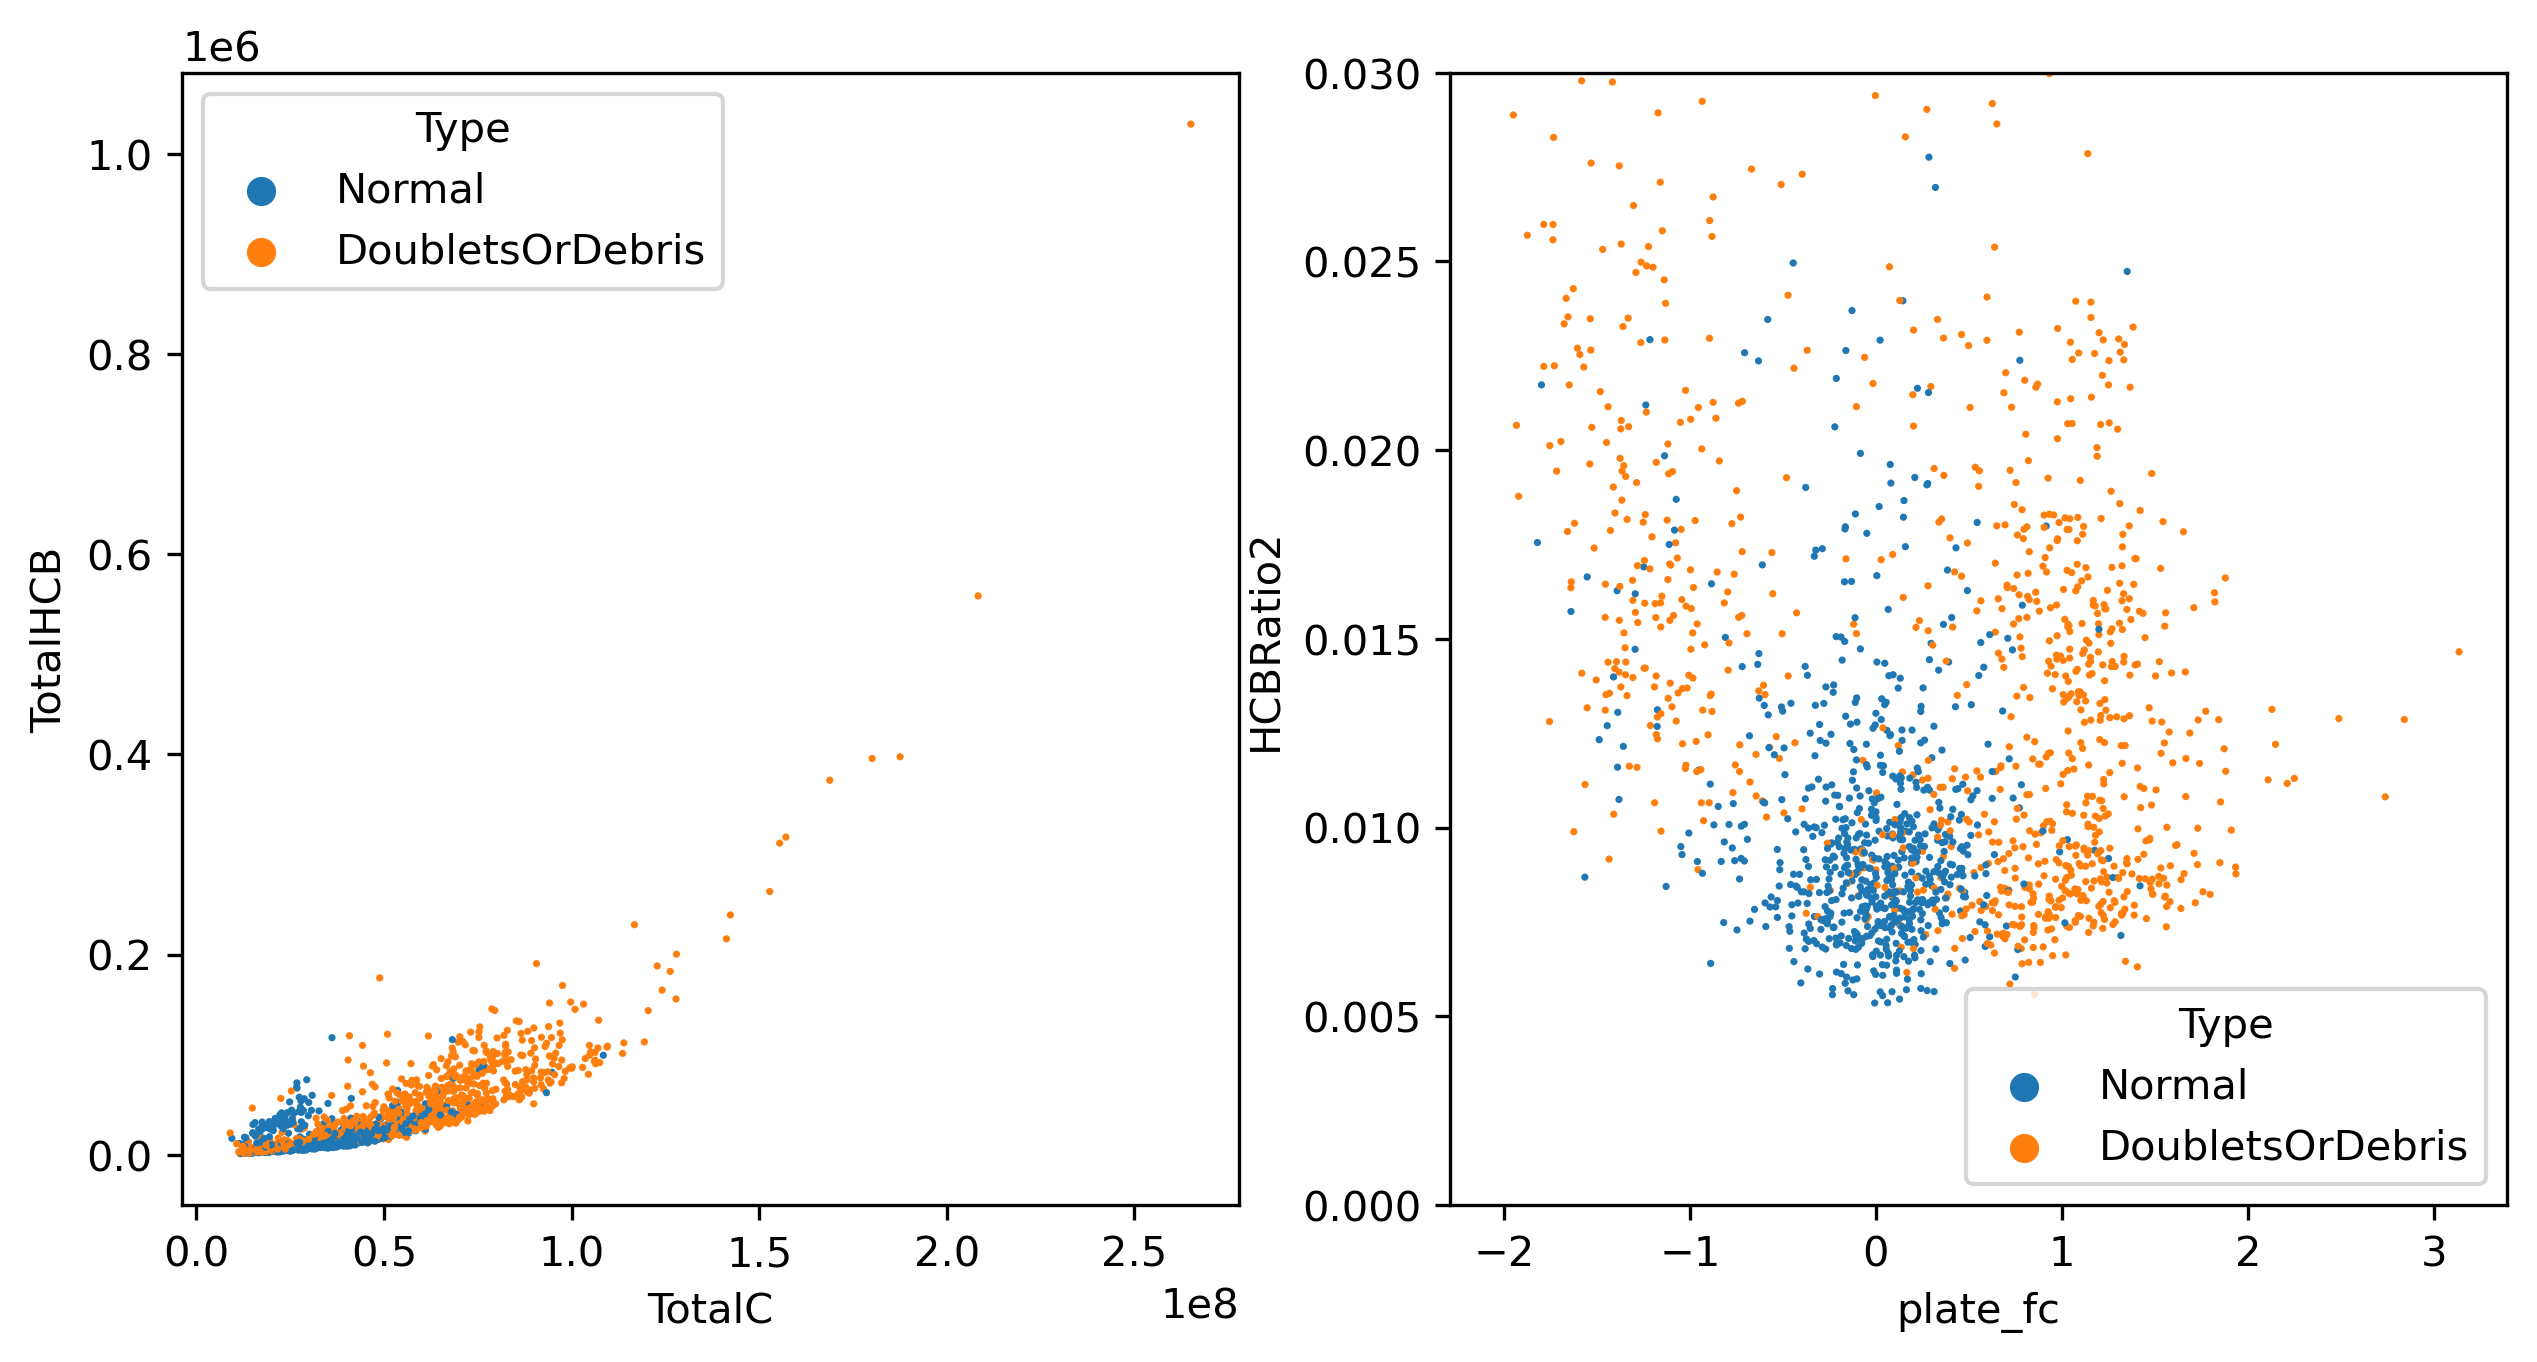

In [49]:
fig, axes = plt.subplots(figsize=(10, 5), dpi=300, ncols=2)
ax = axes[0]
sns.scatterplot(data=total_cells,
                x='TotalC',
                y='TotalHCB',
                s=3,
                linewidth=0,
                hue='Type',
                ax=ax)
ax = axes[1]
sns.scatterplot(data=total_cells,
                x='plate_fc',
                y='HCBRatio2',
                s=3,
                linewidth=0,
                hue='Type',
                ax=ax)
ax.set(ylim=(0, 0.03))

In [15]:
high_normal = total_cells.loc[(total_cells['TotalC'] < 0.5e8)
                & (total_cells['HCBRatio'] > 0.1) &
                (total_cells['Type'] == 'Normal')]


In [32]:
total_cells[total_cells['HCBRatio2'] > 0.012]['Type'].value_counts()

DoubletsOrDebris    552
Normal              241
Name: Type, dtype: int64

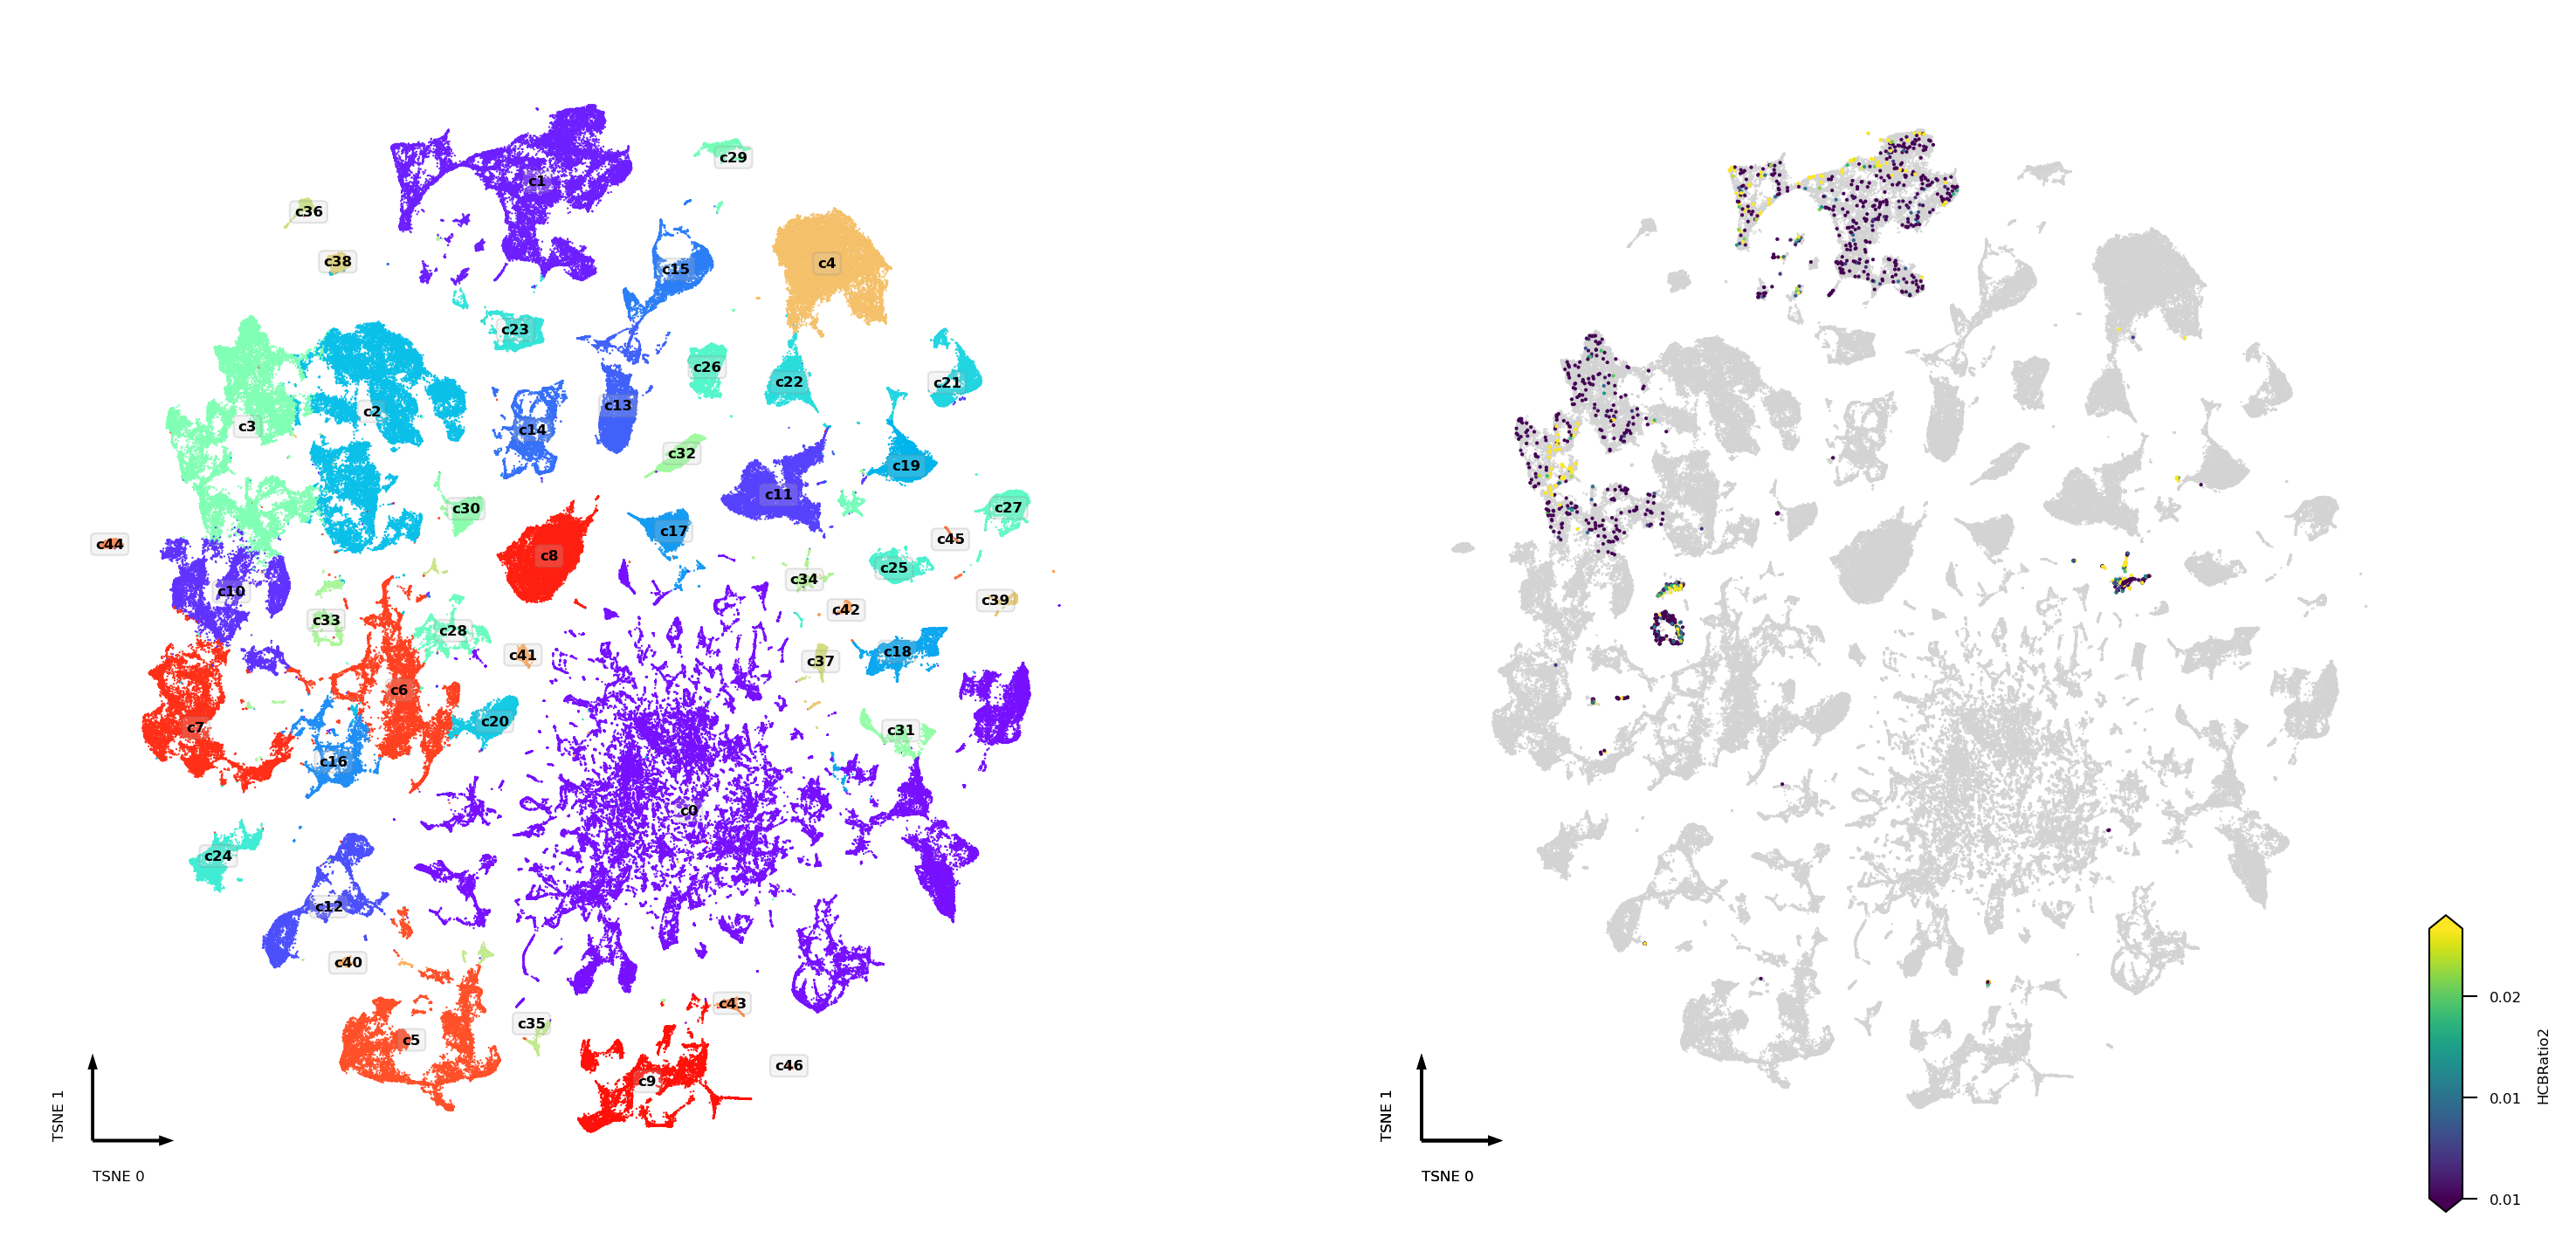

In [37]:
fig, axes = plt.subplots(figsize=(12, 6), dpi=300, ncols=2, nrows=1)
ax = axes[0]
categorical_scatter(data=total_adata.obs,
                    coord_base='tsne',
                    ax=ax,
                    hue='L1',
                    text_anno='L1',
                    s=0.3,
                    max_points=None)
ax = axes[1]
categorical_scatter(data=total_adata.obs,
                    coord_base='tsne',
                    ax=ax,
                    scatter_kws=dict(color='lightgray'),
                    s=0.3,
                    max_points=None)
continuous_scatter(data=total_cells,
                   coord_base='tsne',
                   ax=ax,
                   hue='HCBRatio2',
                   hue_norm=(0.012, 0.02),
                   max_points=None,
                   s=1)

In [9]:
total_cells.to_csv('CEMBA_snmC_doublets.csv.gz')

In [51]:
import pysam
from collections import defaultdict

In [55]:
allc_path = '/home/hanliu/cemba3c/HIP1/CEMBA191126_9J_1-CEMBA191126_9J_2-A11/allc/CEMBA191126_9J_1-CEMBA191126_9J_2-A11-AD001.allc.tsv.gz'

cell_records = defaultdict(int)
context_total = defaultdict(int)
with pysam.TabixFile(allc_path) as allc:
    for i, line in enumerate(allc.fetch()):
        chrom, pos, _, context, mc, cov, _ = line.split('\t')
        cov = int(cov)
        mc = int(mc)
        context_total[context] += 1
        if (mc != 0) and (mc != cov):
            cell_records[context] += 1

In [63]:
data = pd.DataFrame([cell_records, context_total]).T
data['rate'] = data[0] / data[1] * 1000

In [67]:
data.fillna(0).sort_index()

,0,1,rate
CAA,287.0,1578536.0,0.181814
CAC,540.0,1296390.0,0.416541
CAG,395.0,1790690.0,0.220585
CAT,483.0,1388083.0,0.347962
CCA,216.0,1546577.0,0.139663
CCC,165.0,1201948.0,0.137277
CCG,63.0,199693.0,0.315484
CCN,0.0,1.0,0.000000
CCT,277.0,1622458.0,0.170729
CGA,465.0,169387.0,2.745193
